In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Generalized variables
textwidth_cm = 16.50764  # Text width in cm
aspect_ratio = 0.618     # Aspect ratio (height/width) using the golden ratio

# Font sizes
label_fontsize = 12
legend_fontsize = 12
tick_fontsize = 10
colorbar_label_fontsize = 12
colorbar_tick_fontsize = 10
offset_text_fontsize = 12
tick_fontsize = 10
errorbar_capsize = 5

# Convert text width from cm to inches
textwidth_in = textwidth_cm / 2.54

# Calculate figure size based on text width and aspect ratio
fig_width = textwidth_in
fig_height = textwidth_in * aspect_ratio

save_dir = '/home/pkruyt/cernbox/figures_thesis_pdf/betacool_benchmark/'

<>:25: SyntaxWarning: invalid escape sequence '\D'
<>:25: SyntaxWarning: invalid escape sequence '\D'
/tmp/pkruyt/ipykernel_58170/1116355928.py:25: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta$v [m/s]', fontsize=label_fontsize)


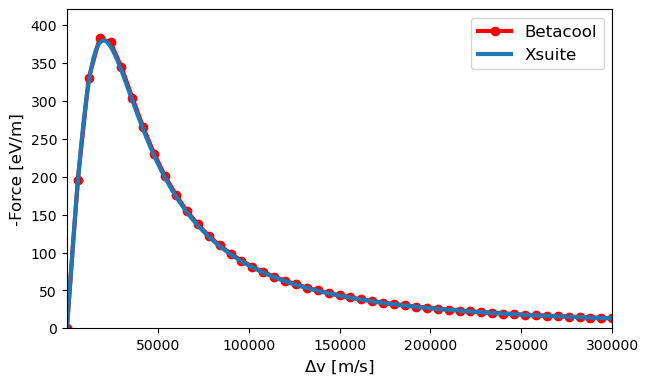

In [5]:
import numpy as np
import matplotlib.pyplot as plt



def load_data(module):
    filename = f"results/force_{module}.npz"
    data = np.load(filename)
    v_diff = data['v_diff']
    force = data['force']
    return v_diff,force

cmap = plt.get_cmap("tab10")
plt.figure(figsize=(fig_width, fig_height))
plt.rcParams.update({'font.size': label_fontsize})


v_diff,force = load_data('betacool')
# plt.plot(v_diff, -force, label=f'betacool',color='red',linestyle='--', linewidth=5.0)
plt.plot(v_diff, -force, label='Betacool', color='red', marker='o', linestyle='-', linewidth=3, markersize=6)

v_diff,force= load_data('xsuite')
plt.plot(v_diff, -force, label=f'Xsuite',color=cmap(0), linewidth=3.0)

plt.xlabel('$\Delta$v [m/s]', fontsize=label_fontsize)
plt.ylabel('-Force [eV/m]', fontsize=label_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=tick_fontsize)
plt.tight_layout()
plt.xlim([1,3e5])
plt.axis(ymin = 0)
image_name = 'LEIR_force_default_parameters.png'
save_location = os.path.join(save_dir, image_name)
plt.savefig(save_location, dpi=300, bbox_inches='tight')
plt.show()

<>:51: SyntaxWarning: invalid escape sequence '\D'
<>:51: SyntaxWarning: invalid escape sequence '\D'
/tmp/pkruyt/ipykernel_58170/2835313606.py:51: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta$v [m/s]', fontsize=label_fontsize)


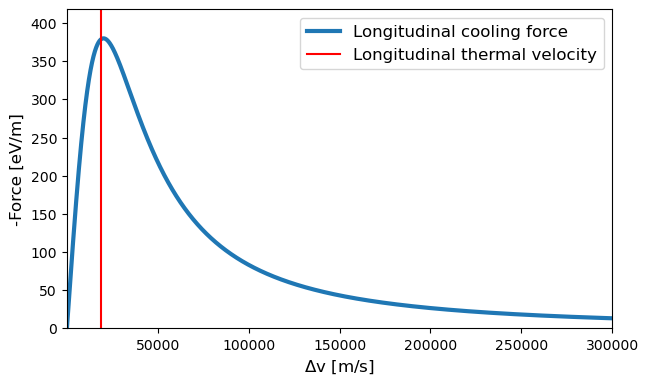

In [20]:
import numpy as np
import matplotlib.pyplot as plt

temp_perp = 100e-3 # <E> [eV] = kb*T
temp_long =  1e-3 # <E> [eV]
c=299792458.0
def temperature_to_velocity_1D(temperature_eV):
    
    T=temperature_eV#J
    mass = 511 *1e3
    velocity = c*np.sqrt( T/ mass)
    return velocity

def temperature_to_velocity_1D(temperature_eV):
    # Convert temperature from eV to Joules
    T = temperature_eV * 1.60218e-19  # in Joules
    mass = 9.10938356e-31  # electron mass in kg
    c = 3e8  # speed of light in m/s
    
    # Calculate velocity using relativistic formula for non-relativistic velocities
    velocity = np.sqrt(2 * T / mass)
    return velocity

velocity_perp = temperature_to_velocity_1D(temp_perp)
velocity_long = temperature_to_velocity_1D(temp_long)

def load_data(module):
    filename = f"results/force_{module}.npz"
    data = np.load(filename)
    v_diff = data['v_diff']
    force = data['force']
    return v_diff,force

cmap = plt.get_cmap("tab10")
plt.figure(figsize=(fig_width, fig_height))
plt.rcParams.update({'font.size': label_fontsize})


v_diff,force = load_data('betacool')
# plt.plot(v_diff, -force, label=f'betacool',color='red',linestyle='--', linewidth=5.0)
#plt.plot(v_diff, -force, label='Betacool', color='red', marker='o', linestyle='-', linewidth=3, markersize=6)

v_diff,force= load_data('xsuite')
plt.plot(v_diff, -force, label=f'Longitudinal cooling force',color=cmap(0), linewidth=3.0)
plt.axvline(velocity_long,label='Longitudinal thermal velocity',color='red')

# plt.plot(v_diff, -force, label=r'Longitudinal cooling force $F_{\parallel}$', color=cmap(0), linewidth=3.0)
# plt.axvline(velocity_long, label=r'Longitudinal thermal velocity $v_{\parallel}$', color='red')


plt.xlabel('$\Delta$v [m/s]', fontsize=label_fontsize)
plt.ylabel('-Force [eV/m]', fontsize=label_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=tick_fontsize)
plt.tight_layout()
plt.xlim([1,3e5])
plt.axis(ymin = 0)

save_dir = '/home/pkruyt/cernbox/figures_thesis_pdf/'
image_name = 'cooling_curve.pdf'
save_location = os.path.join(save_dir, image_name)
plt.savefig(save_location, dpi=300, bbox_inches='tight')
plt.show()

In [7]:
velocity_perp

np.float64(132620.37538573175)

In [8]:
velocity_long

np.float64(13262.037538573173)